<a href="https://colab.research.google.com/github/minsugaa1993/python/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Library yang Diperlukan

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from google.colab import files

- Upload file dataset

In [28]:
uploaded = files.upload()
df = pd.read_csv("Student_performance_data _.csv")


Saving Student_performance_data _.csv to Student_performance_data _ (1).csv


# 2. Menampilkan Informasi Awal Dataset

In [29]:
display(df.head())
df.info()
display(df.describe())
display(df.isnull().sum())

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


# 3. Mengisi Missing Values dengan Median

In [30]:
df.fillna(df.median(), inplace=True)


# 4. Visualisasi Data

- Validasi Kolom Sebelum Visualisasi

In [33]:
print("Kolom yang tersedia dalam dataset:", df.columns.tolist())

Kolom yang tersedia dalam dataset: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


Kolom 'gender' atau 'gpa' tidak ditemukan dalam dataset. Periksa kembali nama kolom!


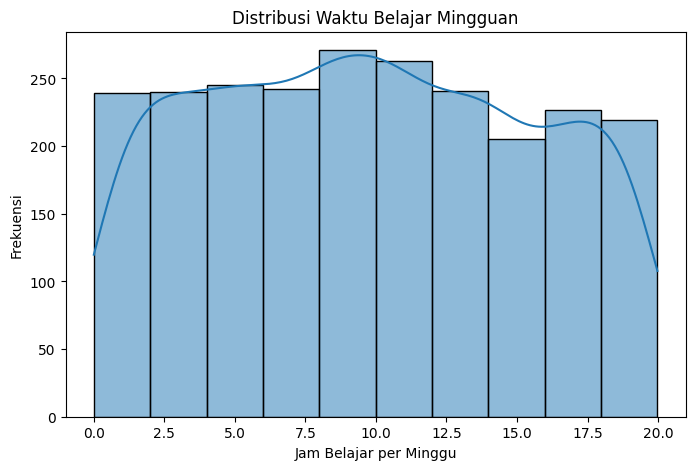

In [34]:
if 'gender' in df.columns and 'gpa' in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["gender"], y=df["gpa"])
    plt.title("Distribusi GPA berdasarkan Gender")
    plt.show()
else:
    print("Kolom 'gender' atau 'gpa' tidak ditemukan dalam dataset. Periksa kembali nama kolom!")

if 'StudyTimeWeekly' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["StudyTimeWeekly"], bins=10, kde=True)
    plt.title("Distribusi Waktu Belajar Mingguan")
    plt.xlabel("Jam Belajar per Minggu")
    plt.ylabel("Frekuensi")
    plt.show()
else:
    print("Kolom 'StudyTimeWeekly' tidak ditemukan dalam dataset. Periksa kembali nama kolom!")

# 5. Analisis Korelasi

In [41]:
if 'StudyTimeWeekly' in df.columns and 'gpa' in df.columns:
    corr_pearson, p_value_pearson = pearsonr(df["StudyTimeWeekly"], df["gpa"])
    print(f"Korelasi Pearson antara Waktu Belajar dan GPA: {corr_pearson:.2f}, p-value: {p_value_pearson:.4f}")

    corr_spearman, p_value_spearman = spearmanr(df["StudyTimeWeekly"], df["gpa"])
    print(f"Korelasi Spearman antara Waktu Belajar dan GPA: {corr_spearman:.2f}, p-value: {p_value_spearman:.4f}")
else:
    print("Kolom 'StudyTimeWeekly' atau 'gpa' tidak ditemukan, tidak dapat melakukan analisis korelasi.")

Kolom 'StudyTimeWeekly' atau 'gpa' tidak ditemukan, tidak dapat melakukan analisis korelasi.


# 6. Heatmap Korelasi

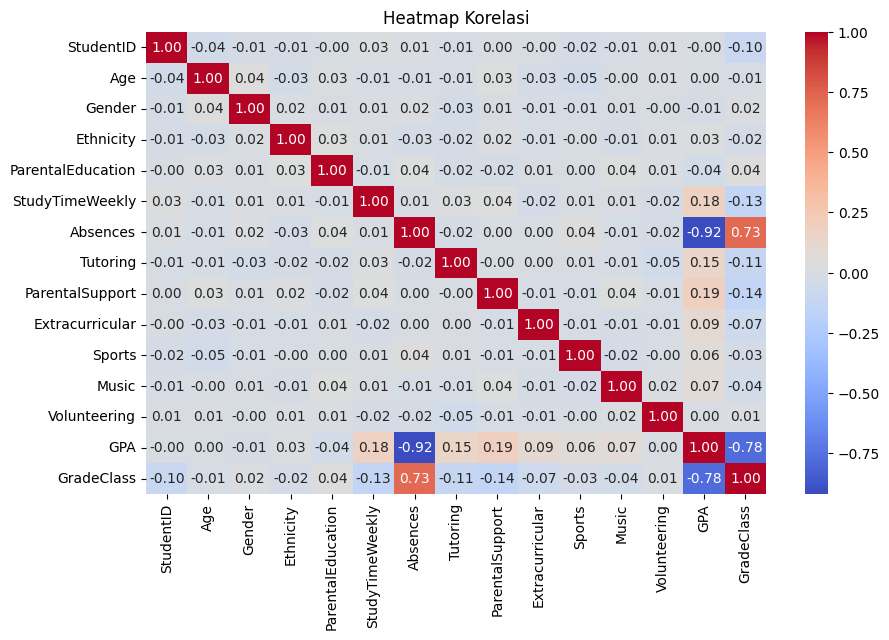

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()
